In [6]:
# main.py
import os
from module_reloader import reload_module

reload_module('parameters_calculation')

from parameters_calculation import calculate_parameters, plot_results

#Access the data files stored in GitHub. These data are not related to the cloned functions. 
#You can copy the address and use them directly on your own computer. Or you can continue editing this notebook file for use.
base_dir = "https://raw.githubusercontent.com/dingruochen/EEG_data/main/Measurements-10_04"
file_names = [
    "COMP_TOP1_10_4.csv",
    "COMP_TOP2_10_4.csv",
    "COMP_TOP3_10_4.csv"
]

file_paths = [os.path.join(base_dir, file_name) for file_name in file_names]

# array to save the results
results = []

for file_path in file_paths:
    result = calculate_parameters(file_path, column_index=1, start_from=2)
    if result:
        snr, peak_freq, peak_power, noise_power_avg, peak_50Hz_power, SSVEP_50Hz_Ratio, freq_full, psdx_full, peak_50Hz_full = result
        
        results.append([os.path.basename(file_path), round(snr, 2), round(peak_freq, 2), round(peak_power, 2), round(noise_power_avg, 2), round(peak_50Hz_power, 2), round(SSVEP_50Hz_Ratio, 2)])

headers = ["File Name", "SNR (dB)", "Peak Frequency (Hz)", "Peak Power (dB/Hz)", "Average Noise Power (dB/Hz)", "Peak 50Hz Power (dB/Hz)", "SSVEP to 50Hz Ratio (dB)"]

column_width = 30

# print column name
print("".ljust(column_width), end="")
for result in results:
    print(result[0].ljust(column_width), end="")
print("\n" + "-" * (column_width * (len(results) + 1)))

# print resluts
for i in range(1, len(headers)):
    print(headers[i].ljust(column_width), end="")
    for result in results:
        print(str(result[i]).ljust(column_width), end="")
    print()

# plot
for file_path in file_paths:
    result = calculate_parameters(file_path, column_index=1, start_from=2)
    if result:
        snr, peak_freq, peak_power, noise_power_avg, peak_50Hz_power, SSVEP_50Hz_Ratio, freq_full, psdx_full, peak_50Hz_full = result
        
        plot_results(freq_full, psdx_full, peak_freq, 10 ** (peak_power / 10), peak_50Hz_full, 10 ** (peak_50Hz_power / 10), snr, 10 ** (noise_power_avg / 10), SSVEP_50Hz_Ratio, file_name=os.path.basename(file_path), plot_title="Periodogram Using FFT for wet electrodes", y_range=(-140, -20))

KeyError: 'ALIGNED'

Parameters                  2channels_nobias1.csv (CH1) 2channels_nobias1.csv (CH2) 2channels_nobias2.csv (CH1) 2channels_nobias2.csv (CH2)
SNR (dB)                                       18.20565                    14.07002                   15.556416                   12.606372
Peak Frequency (Hz)                           12.493346                   12.509981                   12.491683                   12.491683
Peak Power (dB/Hz)                           -69.076036                  -69.620327                  -69.839141                   -69.71702
Average Noise Power (dB/Hz)                  -87.281686                  -83.690347                  -85.395557                  -82.323392
Peak 50Hz Power (dB/Hz)                      -18.061384                  -14.011999                  -19.598335                  -14.114358
Target f to 50Hz Ratio (dB)                  -51.014653                  -55.608329                  -50.240806                  -55.602662


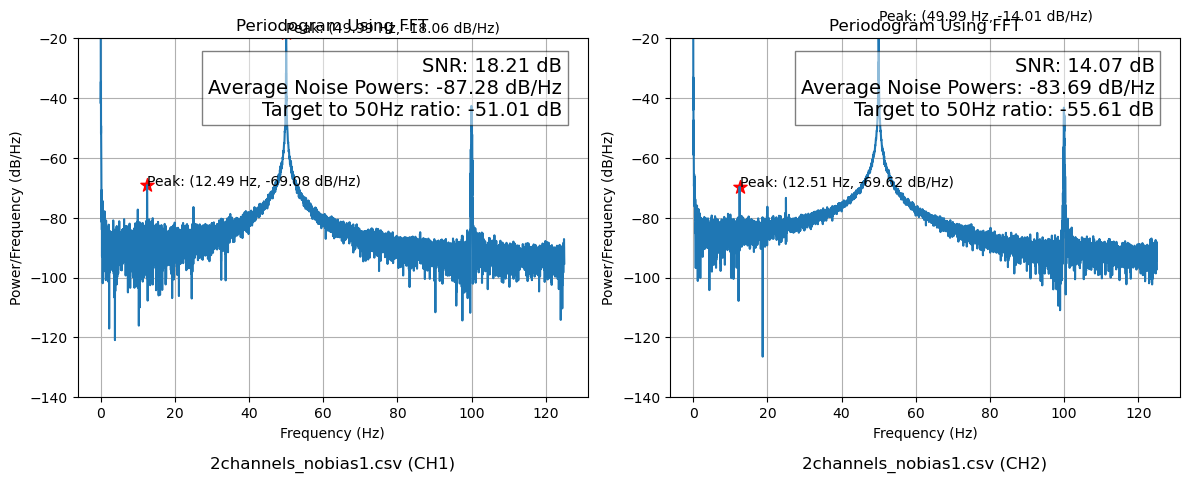

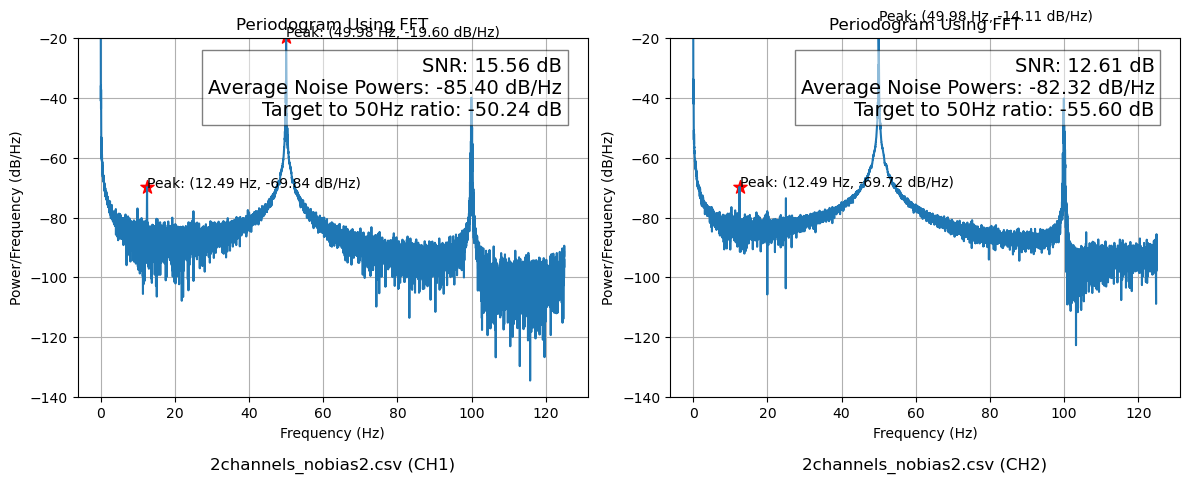

In [18]:
import os
from module_reloader import reload_module

reload_module('parameters_calculation')


from parameters_calculation import process_files

base_dir = "https://raw.githubusercontent.com/dingruochen/EEG_data/main/Measurements-23_04"
file_names = [
    "2channels_nobias1.csv",
    "2channels_nobias2.csv",
]

#process_files(base_dir, file_names, target_frequency=12.5, target_bandwidth=1,noise_range=(5,20),plot_title="Periodogram Using FFT", y_range=(-140, -20))
column_indices = [1,2] 
process_files(base_dir, file_names, column_indices=column_indices, target_frequency=12.5, target_bandwidth=1, noise_range=(5, 20), plot_title="Periodogram Using FFT", y_range=(-140, -20))

Parameters                  330kB_100nV_3k9.csv (CH1) 330kB_1uV_100k.csv (CH1) 330kB_100nV_220k.csv (CH1) 330kB_100nV_330k.csv (CH1) 1MB_100nV_3k9.csv (CH1) 1MB_100nV_100k.csv (CH1) 1MB_100nV_220k.csv (CH1) 1MB_100nV_330k.csv (CH1)
SNR (dB)                                     9.101672                 9.432469                   3.630021                   5.984433               10.126983                 6.976806                 4.325693                 5.736526
Peak Frequency (Hz)                         10.016871                 9.993655                  10.301614                  10.179325               10.002117                10.147992                 9.801855                 9.509721
Peak Power (dB/Hz)                        -113.305151               -90.474315                 -94.746737                 -96.272031             -112.423016              -103.113319              -101.323122               -88.568319
Average Noise Power (dB/Hz)               -122.406823               -99.

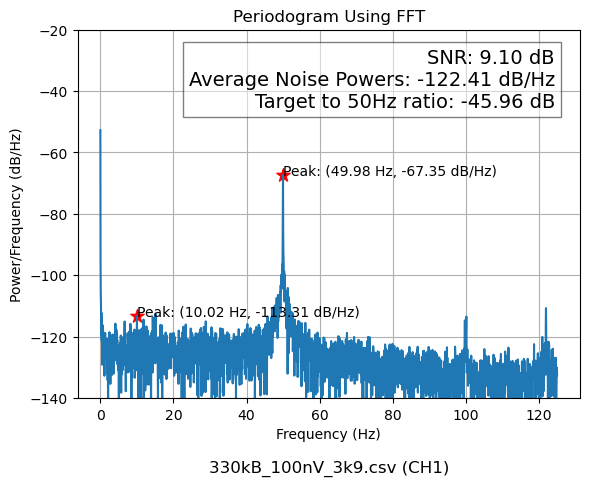

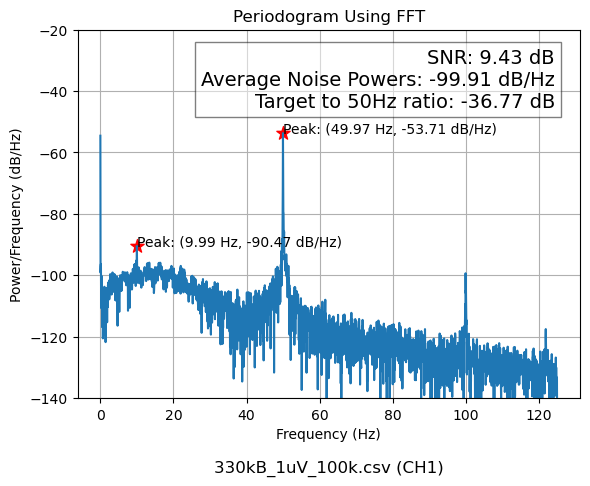

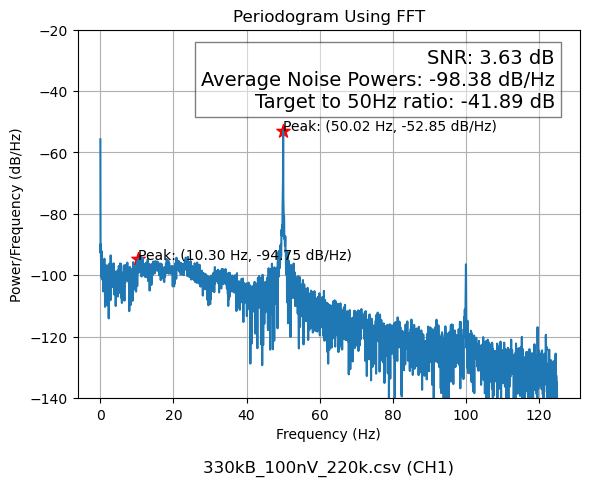

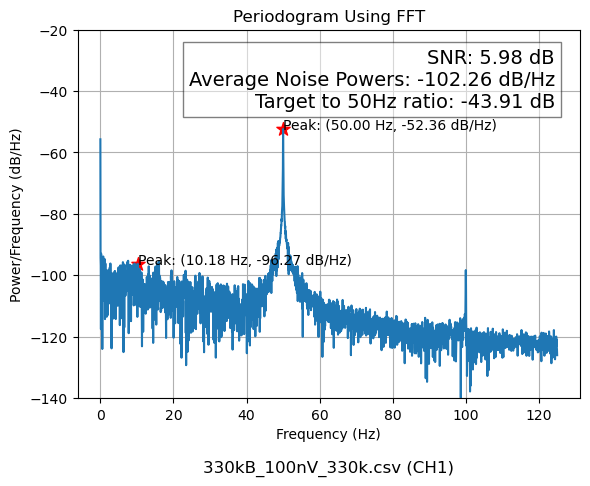

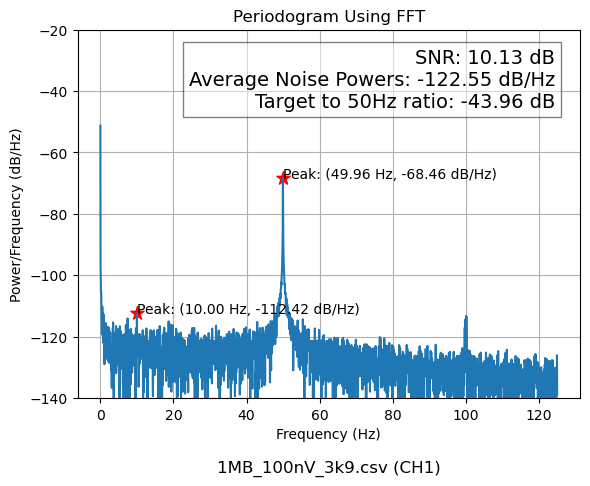

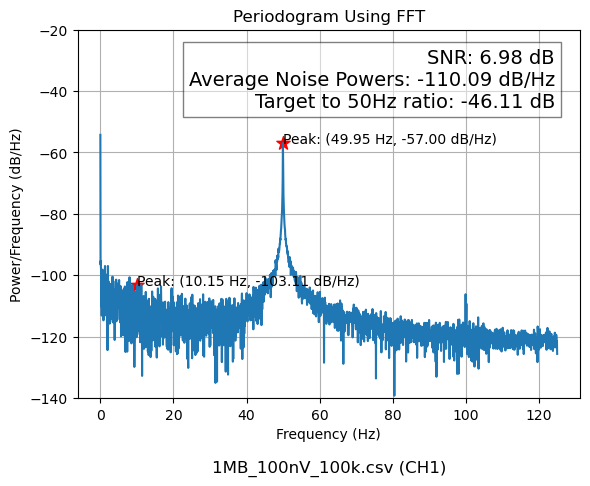

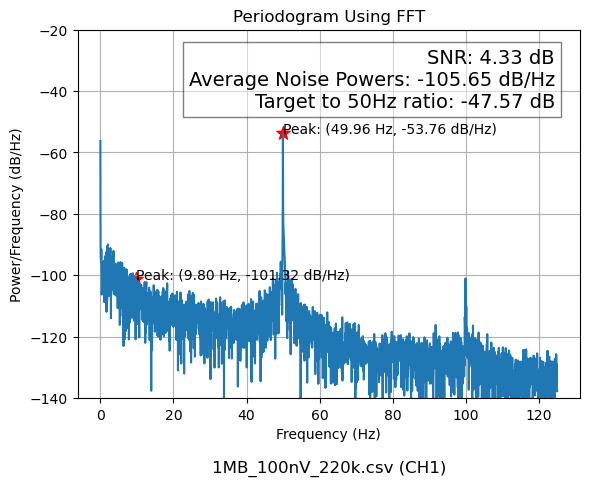

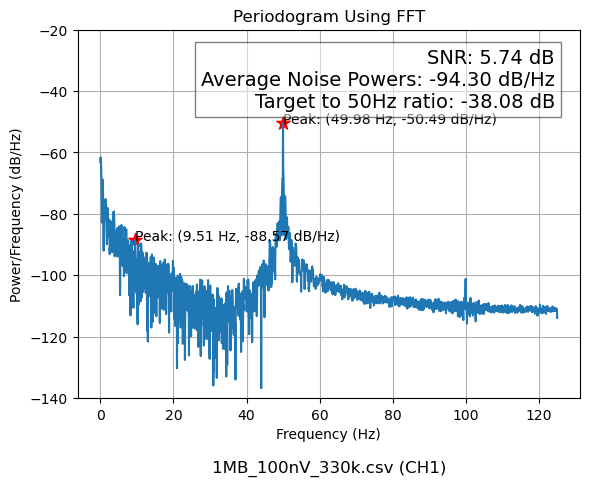

In [19]:
from module_reloader import reload_module
reload_module('parameters_calculation')

from parameters_calculation import process_files


# 示例文件路径和列索引


base_dir = "/Users/ruochending/Documents/MATLAB/Measurements-08_07"
file_names = [
    "330kB_100nV_3k9.csv",
    "330kB_1uV_100k.csv",
    "330kB_100nV_220k.csv",
    "330kB_100nV_330k.csv",
    "1MB_100nV_3k9.csv",
    "1MB_100nV_100k.csv",
    "1MB_100nV_220k.csv",
    "1MB_100nV_330k.csv",
]
# 调用函数进行处理并绘图
column_indices = [1]
process_files(base_dir, file_names, column_indices=column_indices, start_from=300, target_frequency=10, target_bandwidth=1, noise_range=(5, 20), plot_title="Periodogram Using FFT", y_range=(-140, -20))

In [ ]:
from module_reloader import reload_module
reload_module('parameters_calculation')

from parameters_calculation import process_files


# 示例文件路径和列索引


base_dir = "/Users/ruochending/Documents/MATLAB/Measurements-07_07"
file_names = [
    "2nodes_2CHtotal_1.csv"
]
# 调用函数进行处理并绘图
column_indices = [1]
process_files(base_dir, file_names, column_indices=column_indices, start_from=300, target_frequency=10, target_bandwidth=1, noise_range=(5, 20), plot_title="Periodogram Using FFT", y_range=(-140, -20),delimiter='\t')